    
The implementation of the Resnet50V2 architecture in this project is based on the ResnetV2 Algorithm implementation presented in the "Deep Learning with Python, 2nd Edition" book. The project also draws significant inspiration and follows the structure provided in a paper by Aditya Naik (2021) titled "X-ray image classification using Transfer Learning", which can be found at https://www.kaggle.com/code/adityanaik42/x-ray-image-classification-using-transfer-learning.

Chest X-Ray Pathosis Classification using ResNet50V2

In [ ]:
Importing the Dependencies

In [ ]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import gc
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
tf.keras.backend.clear_session()


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# importing the libraries
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
%matplotlib inline

Data Extraction

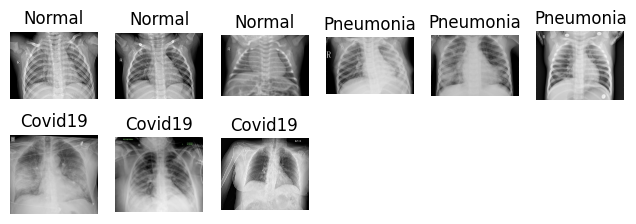

In [ ]:
PATH = "C:/Users/yashs/Downloads/Data"

import os

def extract_images(chest_xray_path):
    train_data = []
    test_data = []

    for subfolder in ['PNEUMONIA', 'NORMAL', 'COVID19']:
        train_subfolder_path = os.path.join(chest_xray_path, 'train', subfolder)
        test_subfolder_path = os.path.join(chest_xray_path, 'test', subfolder)

        # Append file paths to train and test lists
        for image_filename in os.listdir(train_subfolder_path):
            train_data.append(os.path.join(train_subfolder_path, image_filename))

        for image_filename in os.listdir(test_subfolder_path):
            test_data.append(os.path.join(test_subfolder_path, image_filename))

    return train_data, test_data

train_set, test_set = extract_images(PATH)



def plot_train_images(train_data):

    fig = plt.figure(figsize=(12, 4))

    normal_indices = random.sample([i for i, path in enumerate(train_data) if 'NORMAL' in path], 3)

    pneumonia_indices = random.sample([i for i, path in enumerate(train_data) if 'PNEUMONIA' in path], 3)

    covid19_indices = random.sample([i for i, path in enumerate(train_data) if 'COVID19' in path], 3)

    # Plot images
    for i, idx in enumerate(normal_indices):
        # Load image
        img = mpimg.imread(train_data[idx])
        # Plot image and label
        ax = fig.add_subplot(3, 9, i+1)
        ax.imshow(img, cmap='gray')
        ax.set_title('Normal')
        ax.axis('off')

    for i, idx in enumerate(pneumonia_indices):
        # Load image
        img = mpimg.imread(train_data[idx])
        # Plot image and label
        ax = fig.add_subplot(3, 9, i+4)
        ax.imshow(img, cmap='gray')
        ax.set_title('Pneumonia')
        ax.axis('off')

    for i, idx in enumerate(covid19_indices):
        # Load image
        img = mpimg.imread(train_data[idx])
        # Plot image and label
        ax = fig.add_subplot(3, 9, i+10)
        ax.imshow(img, cmap='gray')
        ax.set_title('Covid19')
        ax.axis('off')

    # Show plot
    plt.show()

plot_train_images(train_set)

C:/Users/yashs/Downloads/Data\train\NORMAL\NORMAL(10).jpg
(2155, 2443, 3)


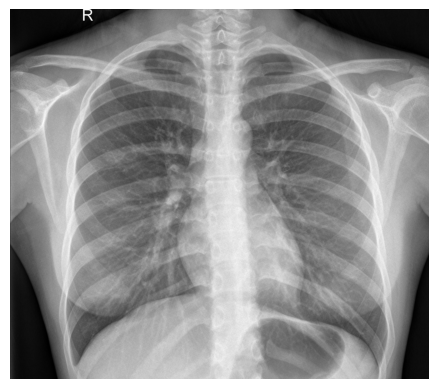

C:/Users/yashs/Downloads/Data\train\NORMAL\NORMAL(100).jpg
(1615, 1860, 3)


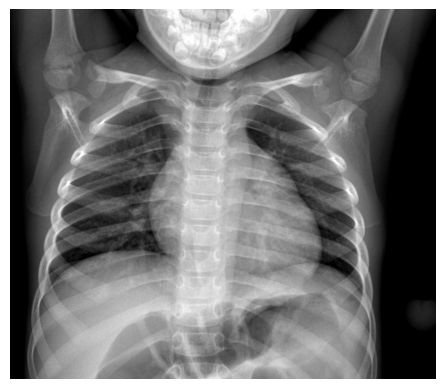

C:/Users/yashs/Downloads/Data\train\COVID19\COVID19(10).jpg
(1031, 1038, 3)


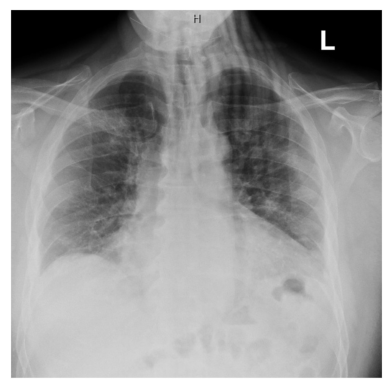

C:/Users/yashs/Downloads/Data\train\COVID19\COVID19(100).jpg
(1210, 1353, 3)


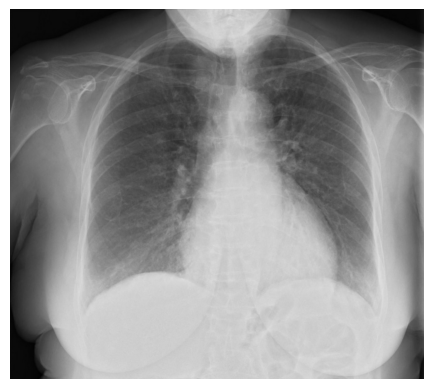

C:/Users/yashs/Downloads/Data\train\PNEUMONIA\PNEUMONIA(10).jpg
(1039, 1427, 3)


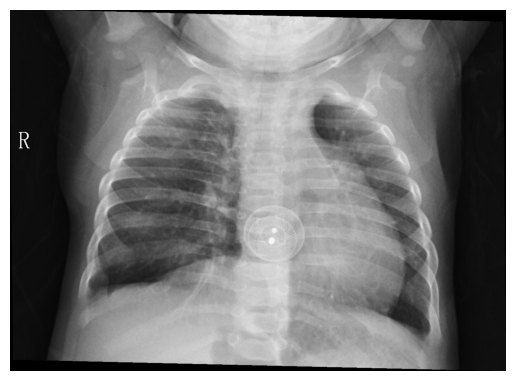

C:/Users/yashs/Downloads/Data\train\PNEUMONIA\PNEUMONIA(100).jpg
(1138, 1536, 3)


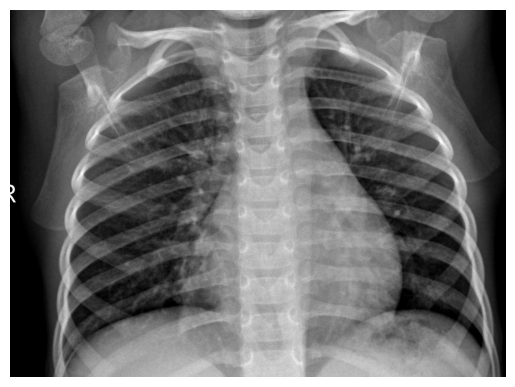

In [ ]:
import os

base_directory = 'C:/Users/yashs/Downloads/Data'
train_directory = os.path.join(base_directory, 'train')
test_directory = os.path.join(base_directory, 'test')


normal_images = os.path.join(train_directory, 'NORMAL')
covid_images = os.path.join(train_directory, 'COVID19')
pneumonia_images = os.path.join(train_directory, 'PNEUMONIA')


normal_images_test = os.path.join(test_directory, 'NORMAL')
covid_images_test = os.path.join(test_directory, 'COVID19')
pneumonia_images_test = os.path.join(test_directory, 'PNEUMONIA')

for d in [normal_images, covid_images, pneumonia_images]:
    temp = []
    for dirname, _, filenames in os.walk(d):
        for filename in filenames:
            temp.append(os.path.join(dirname, filename))
    if d == normal_images:
        df_normal = pd.DataFrame(temp)
    if d == covid_images:
        df_covid = pd.DataFrame(temp)
    if d == pneumonia_images:
        df_pneumonia = pd.DataFrame(temp)

for d in [normal_images_test, covid_images_test, pneumonia_images_test]:
    temp = []
    for dirname, _, filenames in os.walk(d):
        for filename in filenames:
            temp.append(os.path.join(dirname, filename))
    if d == normal_images_test:
        df_normal_test = pd.DataFrame(temp)
    if d == covid_images_test:
        df_covid_test = pd.DataFrame(temp)
    if d == pneumonia_images_test:
        df_pneumonia_test = pd.DataFrame(temp)

normal_files = os.listdir(normal_images)
covid_files = os.listdir(covid_images)
pneumonia_files = os.listdir(pneumonia_images)


pic_index = 4

normal = [os.path.join(normal_images, fname)
                for fname in normal_files[pic_index-2:pic_index]]
covid = [os.path.join(covid_images, fname)
                for fname in covid_files[pic_index-2:pic_index]]
pneumonia = [os.path.join(pneumonia_images, fname)
                for fname in pneumonia_files[pic_index-2:pic_index]]

for i, img_path in enumerate(normal+covid+pneumonia):
    print(img_path)
    img = mpimg.imread(img_path)
    print(img.shape)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

Data Preprocessing

In [ ]:
df_normal.rename(columns = {0:'images'}, inplace = True)
df_normal['target'] = 'NORMAL'

df_normal_test.rename(columns = {0:'images'}, inplace = True)
df_normal_test['target'] = 'NORMAL'

df_covid.rename(columns = {0:'images'}, inplace = True)
df_covid['target'] = 'COVID19'

df_covid_test.rename(columns = {0:'images'}, inplace = True)
df_covid_test['target'] = 'COVID19'

df_pneumonia.rename(columns = {0:'images'}, inplace = True)
df_pneumonia['target'] = 'PNEUMONIA'

df_pneumonia_test.rename(columns = {0:'images'}, inplace = True)
df_pneumonia_test['target'] = 'PNEUMONIA'

print('No. of training images of Normal X-rays: ', len(df_normal))
print('No. of training images of Covid X-rays: ', len(df_covid))
print('No. of training images of Pneumonia X-rays: ', len(df_pneumonia))


No. of training images of Normal X-rays:  1266
No. of training images of Covid X-rays:  460
No. of training images of Pneumonia X-rays:  3418


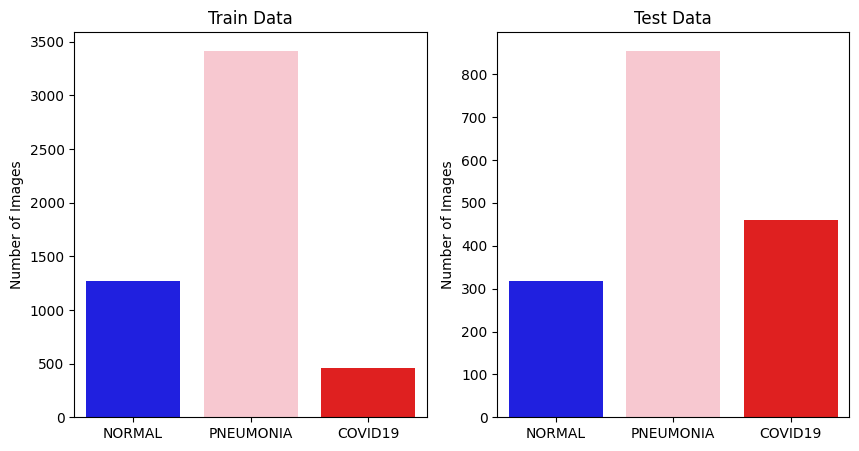

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

train_path = PATH + '/train'
test_path = PATH + '/test'

train_pneumonia_dir = os.path.join(train_path, 'PNEUMONIA')
train_normal_dir = os.path.join(train_path, 'NORMAL')
train_covid_dir = os.path.join(train_path, 'COVID19')
num_train_pneumonia = len(os.listdir(train_pneumonia_dir))
num_train_normal = len(os.listdir(train_normal_dir))
num_train_covid = len(os.listdir(train_covid_dir))

test_pneumonia_dir = os.path.join(test_path, 'PNEUMONIA')
test_normal_dir = os.path.join(test_path, 'NORMAL')
test_covid_dir = os.path.join(test_path, 'COVID19')
num_test_pneumonia = len(os.listdir(test_pneumonia_dir))
num_test_normal = len(os.listdir(test_normal_dir))
num_test_covid = len(os.listdir(test_covid_dir))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.barplot(x=['NORMAL', 'PNEUMONIA', 'COVID19'], y=[num_train_normal, num_train_pneumonia, num_train_covid], palette=['blue', 'pink', 'red'], ax=ax1)
ax1.set(title='Train Data', ylabel='Number of Images')

sns.barplot(x=['NORMAL', 'PNEUMONIA', 'COVID19'], y=[num_test_normal, num_test_pneumonia, num_train_covid], palette=['blue', 'pink', 'red'], ax=ax2)
ax2.set(title='Test Data', ylabel='Number of Images')

plt.show()

Since the Dataset is unbalanced, we will we sampling 460 images from Normal and Pneumonia classes.

In [ ]:
df_normal_new = df_normal.sample(460)
df_pneumonia_new = df_pneumonia.sample(460)

print('No. of training images of Normal X-rays: ', len(df_normal_new))
print('No. of training images of Covid X-rays: ', len(df_covid))
print('No. of training images of Pneumonia X-rays: ', len(df_pneumonia_new))

train_data = pd.concat([df_normal_new, df_covid, df_pneumonia_new], axis = 0)
print('Number of training images: ',len(train_data))
np.random.RandomState(42)
train_data = train_data.sample(frac = 1, random_state = 42)
train_data.head()

No. of training images of Normal X-rays:  460
No. of training images of Covid X-rays:  460
No. of training images of Pneumonia X-rays:  460
Number of training images:  1380


,images,target
749,C:/Users/yashs/Downloads/Data\train\NORMAL\NOR...,NORMAL
88,C:/Users/yashs/Downloads/Data\train\COVID19\CO...,COVID19
2279,C:/Users/yashs/Downloads/Data\train\PNEUMONIA\...,PNEUMONIA
1647,C:/Users/yashs/Downloads/Data\train\PNEUMONIA\...,PNEUMONIA
21,C:/Users/yashs/Downloads/Data\train\COVID19\CO...,COVID19


In [ ]:
print('No. of test images of Normal X-rays: ', len(df_normal_test))
print('No. of test images of Covid X-rays: ', len(df_covid_test))
print('No. of test images of Pneumonia X-rays: ', len(df_pneumonia_test))


test_data = pd.concat([df_normal_test, df_covid_test, df_pneumonia_test], axis = 0)
print('Number of test images: ',len(test_data))
test_data.head()

No. of test images of Normal X-rays:  317
No. of test images of Covid X-rays:  116
No. of test images of Pneumonia X-rays:  855
Number of test images:  1288


,images,target
0,C:/Users/yashs/Downloads/Data\test\NORMAL\NORM...,NORMAL
1,C:/Users/yashs/Downloads/Data\test\NORMAL\NORM...,NORMAL
2,C:/Users/yashs/Downloads/Data\test\NORMAL\NORM...,NORMAL
3,C:/Users/yashs/Downloads/Data\test\NORMAL\NORM...,NORMAL
4,C:/Users/yashs/Downloads/Data\test\NORMAL\NORM...,NORMAL


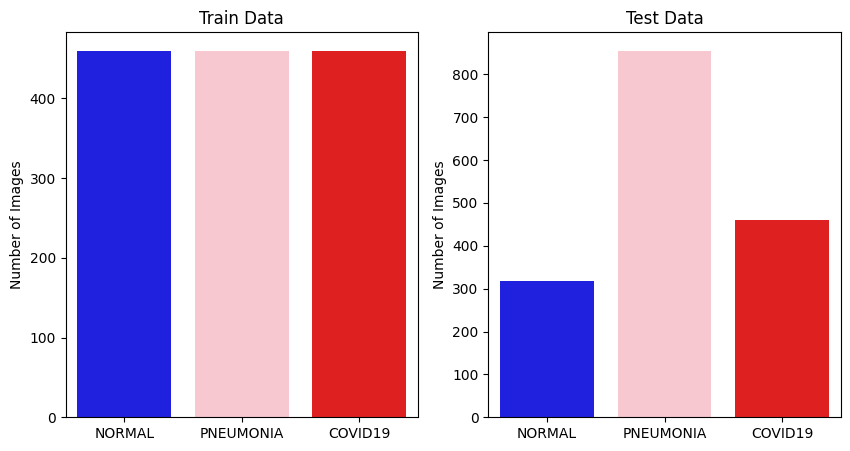

In [ ]:
num_train_pneumonia = len(df_pneumonia_new)
num_train_normal = len(df_normal_new)
num_train_covid = len(df_covid)

num_test_pneumonia = len(os.listdir(test_pneumonia_dir))
num_test_normal = len(os.listdir(test_normal_dir))
num_test_covid = len(os.listdir(test_covid_dir))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.barplot(x=['NORMAL', 'PNEUMONIA', 'COVID19'], y=[num_train_normal, num_train_pneumonia, num_train_covid], palette=['blue', 'pink', 'red'], ax=ax1)
ax1.set(title='Train Data', ylabel='Number of Images')

sns.barplot(x=['NORMAL', 'PNEUMONIA', 'COVID19'], y=[num_test_normal, num_test_pneumonia, num_train_covid], palette=['blue', 'pink', 'red'], ax=ax2)
ax2.set(title='Test Data', ylabel='Number of Images')

plt.show()

In [ ]:
print('Number of null values in the images column for train data: ', np.count_nonzero(train_data['images'].isnull()))
print('Number of null values in the target column for train data: ', np.count_nonzero(train_data['target'].isnull()))
print('Number of null values in the images column for test data: ', np.count_nonzero(test_data['images'].isnull()))
print('Number of null values in the target column for test data: ', np.count_nonzero(test_data['target'].isnull()))

Number of null values in the images column for train data:  0
Number of null values in the target column for train data:  0
Number of null values in the images column for test data:  0
Number of null values in the target column for test data:  0


Data Augumentation

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255,            #Initialising the Datagenrator from tensrflow with pixel normalisation
                                  rotation_range = 10,    #adding random rotations upto 10
                                  width_shift_range = 0.10, #witdh shift for upto 10%
                                  height_shift_range = 0.10, #height shift for upto 10%
                                  horizontal_flip = True,   #horizontal flip for left and right lung position change
                                  validation_split = 0.1   #making a 10% data split for validation set
                                  )
train_data_generator = datagen.flow_from_dataframe(
    train_data,
    x_col = 'images',
    y_col = 'target',
    classes=['NORMAL', 'COVID19', 'PNEUMONIA'],
    batch_size = 8,
    target_size=(224, 224),
    shuffle = True,
    seed = 42,
    class_mode = 'sparse',
    validate_filenames = True,
    subset = 'training'
)

val_data_generator = datagen.flow_from_dataframe(
    train_data,
    x_col = 'images',
    y_col = 'target',
    classes=['NORMAL', 'COVID19', 'PNEUMONIA'],
    target_size=(224, 224),
    batch_size = 8,
    shuffle = True,
    seed = 42,
    class_mode = 'sparse',
    validate_filenames = True,
    subset = 'validation'
)

datagen_test = ImageDataGenerator(rescale = 1./255) #Initialising a testing Datagenrator from tensrflow with just pixel normalisation

test_data_generator = datagen_test.flow_from_dataframe(
    test_data,
    x_col = 'images',
    y_col = 'target',
    classes=['NORMAL', 'COVID19', 'PNEUMONIA'],
    batch_size = 8,
    shuffle = False,
    seed = 42,
    class_mode = 'sparse',
    validate_filenames = True,
    )

Found 1242 validated image filenames belonging to 3 classes.
Found 138 validated image filenames belonging to 3 classes.
Found 1288 validated image filenames belonging to 3 classes.


Base Model

Creating a Base Model

In [ ]:
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

output = tf.keras.layers.Dense(3, activation="softmax")(avg)


base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

94668760/94668760 [==============================] - 22s 0us/step


In [ ]:
epoch_val=30
history=base_model.fit(train_data_generator,epochs=30,validation_data=val_data_generator,verbose=1)

Epoch 1/30
156/156 [==============================] - 47s 225ms/step - loss: 0.6427 - sparse_categorical_accuracy: 0.7746 - val_loss: 27.5844 - val_sparse_categorical_accuracy: 0.4420
Epoch 2/30
156/156 [==============================] - 24s 152ms/step - loss: 0.3755 - sparse_categorical_accuracy: 0.8720 - val_loss: 1.4409 - val_sparse_categorical_accuracy: 0.6739
Epoch 3/30
156/156 [==============================] - 24s 151ms/step - loss: 0.3507 - sparse_categorical_accuracy: 0.8841 - val_loss: 2.2760 - val_sparse_categorical_accuracy: 0.6957
Epoch 4/30
156/156 [==============================] - 24s 152ms/step - loss: 0.3004 - sparse_categorical_accuracy: 0.8921 - val_loss: 5.8981 - val_sparse_categorical_accuracy: 0.3551
Epoch 5/30
156/156 [==============================] - 24s 153ms/step - loss: 0.2985 - sparse_categorical_accuracy: 0.8889 - val_loss: 0.8419 - val_sparse_categorical_accuracy: 0.7899
Epoch 6/30
156/156 [==============================] - 24s 152ms/step - loss: 0.2839 

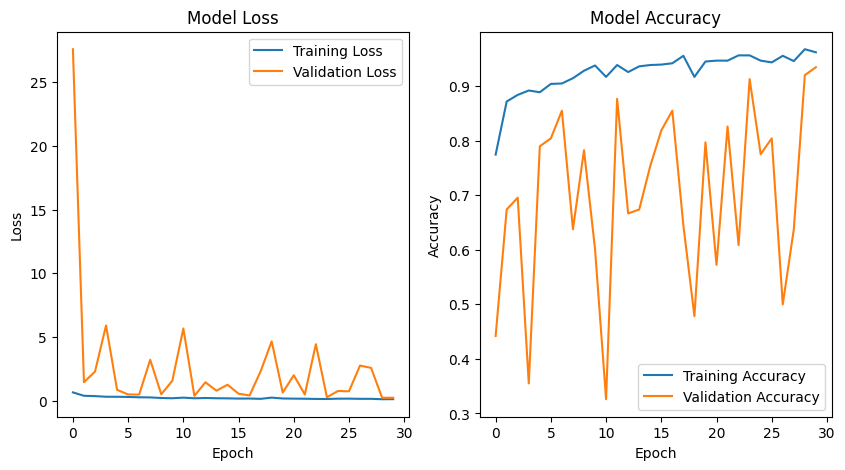

In [ ]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

In [ ]:
base_model.evaluate(test_data_generator)


y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)
confusion_matrix(test_data_generator.classes, y_train_pred)
p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

161/161 [==============================] - 11s 62ms/step
precision:  0.8513280589960397
recall:  0.9372743881532033
F1 score:  0.884760034395197


Hyperparameter Tuning

Tuning the model for Dropout

In [ ]:
dropout_epoch=15

Dropout=0.5

Epoch 1/15
156/156 [==============================] - 27s 155ms/step - loss: 0.6410 - sparse_categorical_accuracy: 0.7754 - val_loss: 147.6366 - val_sparse_categorical_accuracy: 0.4275
Epoch 2/15
156/156 [==============================] - 24s 152ms/step - loss: 0.4543 - sparse_categorical_accuracy: 0.8382 - val_loss: 23.5166 - val_sparse_categorical_accuracy: 0.3261
Epoch 3/15
156/156 [==============================] - 24s 153ms/step - loss: 0.3846 - sparse_categorical_accuracy: 0.8623 - val_loss: 1.0422 - val_sparse_categorical_accuracy: 0.7246
Epoch 4/15
156/156 [==============================] - 24s 155ms/step - loss: 0.4047 - sparse_categorical_accuracy: 0.8583 - val_loss: 1.5434 - val_sparse_categorical_accuracy: 0.4348
Epoch 5/15
156/156 [==============================] - 24s 154ms/step - loss: 0.2968 - sparse_categorical_accuracy: 0.9163 - val_loss: 0.4078 - val_sparse_categorical_accuracy: 0.8986
Epoch 6/15
156/156 [==============================] - 24s 152ms/step - loss: 0.328

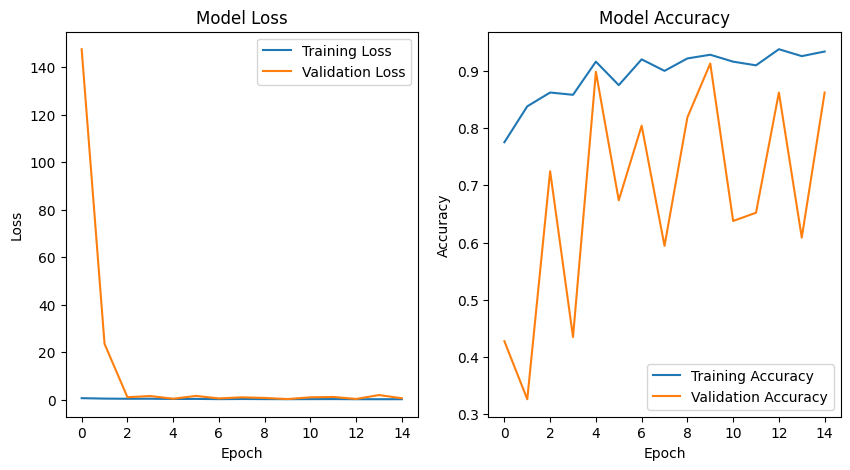

161/161 [==============================] - 11s 63ms/step
precision:  0.7295254887929076
recall:  0.8711064376679519
F1 score:  0.7664928749297143


In [ ]:
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

dropout=tf.keras.layers.Dropout(.5)(avg)

output = tf.keras.layers.Dense(3, activation="softmax")(dropout)


base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=dropout_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

base_model.evaluate(test_data_generator)


y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Dropout=0.6

Epoch 1/15
156/156 [==============================] - 28s 156ms/step - loss: 0.7186 - sparse_categorical_accuracy: 0.7375 - val_loss: 60.3124 - val_sparse_categorical_accuracy: 0.3768
Epoch 2/15
156/156 [==============================] - 24s 155ms/step - loss: 0.5208 - sparse_categorical_accuracy: 0.8084 - val_loss: 33.6694 - val_sparse_categorical_accuracy: 0.3333
Epoch 3/15
156/156 [==============================] - 24s 153ms/step - loss: 0.4784 - sparse_categorical_accuracy: 0.8156 - val_loss: 1.3449 - val_sparse_categorical_accuracy: 0.6884
Epoch 4/15
156/156 [==============================] - 24s 152ms/step - loss: 0.3393 - sparse_categorical_accuracy: 0.8824 - val_loss: 3.2317 - val_sparse_categorical_accuracy: 0.5507
Epoch 5/15
156/156 [==============================] - 24s 155ms/step - loss: 0.3465 - sparse_categorical_accuracy: 0.8808 - val_loss: 2.2106 - val_sparse_categorical_accuracy: 0.6667
Epoch 6/15
156/156 [==============================] - 24s 153ms/step - loss: 0.2904

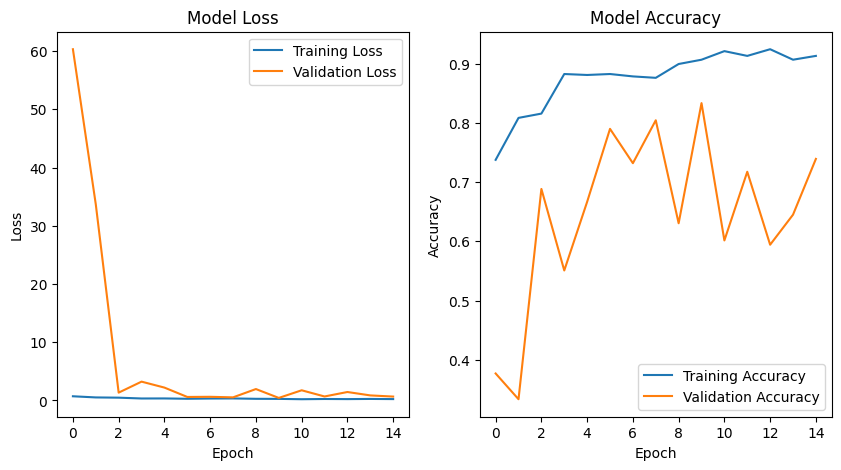

161/161 [==============================] - 11s 64ms/step
precision:  0.6053411614452778
recall:  0.7062747017658363
F1 score:  0.49109028882733874


In [ ]:
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

dropout=tf.keras.layers.Dropout(.6)(avg)

output = tf.keras.layers.Dense(3, activation="softmax")(dropout)


base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=dropout_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

base_model.evaluate(test_data_generator)


y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Dropout=0.7

Epoch 1/15
156/156 [==============================] - 28s 158ms/step - loss: 0.7522 - sparse_categorical_accuracy: 0.7424 - val_loss: 13.5092 - val_sparse_categorical_accuracy: 0.3406
Epoch 2/15
156/156 [==============================] - 25s 157ms/step - loss: 0.5224 - sparse_categorical_accuracy: 0.8140 - val_loss: 1.1667 - val_sparse_categorical_accuracy: 0.5725
Epoch 3/15
156/156 [==============================] - 24s 155ms/step - loss: 0.4497 - sparse_categorical_accuracy: 0.8333 - val_loss: 0.9346 - val_sparse_categorical_accuracy: 0.6667
Epoch 4/15
156/156 [==============================] - 24s 152ms/step - loss: 0.4588 - sparse_categorical_accuracy: 0.8446 - val_loss: 5.8028 - val_sparse_categorical_accuracy: 0.5942
Epoch 5/15
156/156 [==============================] - 24s 156ms/step - loss: 0.4113 - sparse_categorical_accuracy: 0.8494 - val_loss: 23.6652 - val_sparse_categorical_accuracy: 0.3841
Epoch 6/15
156/156 [==============================] - 24s 155ms/step - loss: 0.4361

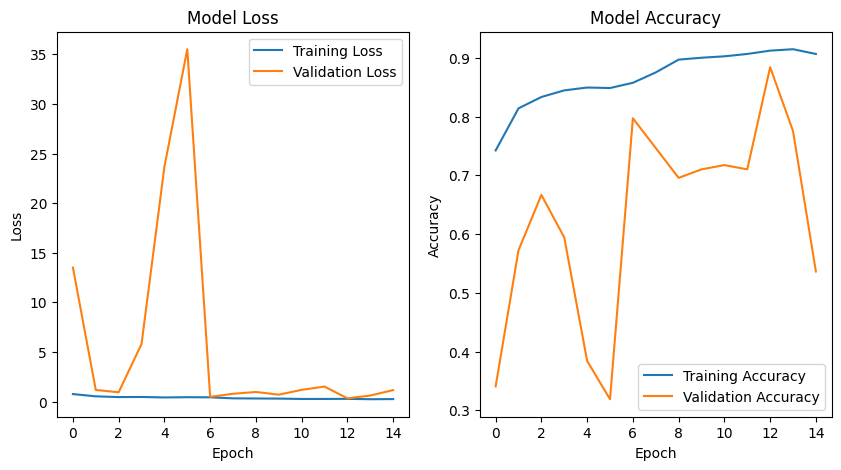

161/161 [==============================] - 11s 64ms/step
precision:  0.31618357487922705
recall:  0.5516132284734826
F1 score:  0.36132773816597347


C:\Users\yashs\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

dropout=tf.keras.layers.Dropout(.7)(avg)

output = tf.keras.layers.Dense(3, activation="softmax")(dropout)


base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=dropout_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

base_model.evaluate(test_data_generator)


y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Dropout=0.8

Epoch 1/15
156/156 [==============================] - 28s 155ms/step - loss: 0.8101 - sparse_categorical_accuracy: 0.7077 - val_loss: 79.9959 - val_sparse_categorical_accuracy: 0.3986
Epoch 2/15
156/156 [==============================] - 24s 151ms/step - loss: 0.9218 - sparse_categorical_accuracy: 0.6634 - val_loss: 5132.8491 - val_sparse_categorical_accuracy: 0.3768
Epoch 3/15
156/156 [==============================] - 24s 155ms/step - loss: 0.6627 - sparse_categorical_accuracy: 0.7713 - val_loss: 15.6975 - val_sparse_categorical_accuracy: 0.4638
Epoch 4/15
156/156 [==============================] - 24s 153ms/step - loss: 0.4925 - sparse_categorical_accuracy: 0.8229 - val_loss: 1.7198 - val_sparse_categorical_accuracy: 0.7319
Epoch 5/15
156/156 [==============================] - 24s 152ms/step - loss: 0.4852 - sparse_categorical_accuracy: 0.8277 - val_loss: 2.4644 - val_sparse_categorical_accuracy: 0.4638
Epoch 6/15
156/156 [==============================] - 24s 155ms/step - loss: 0.3

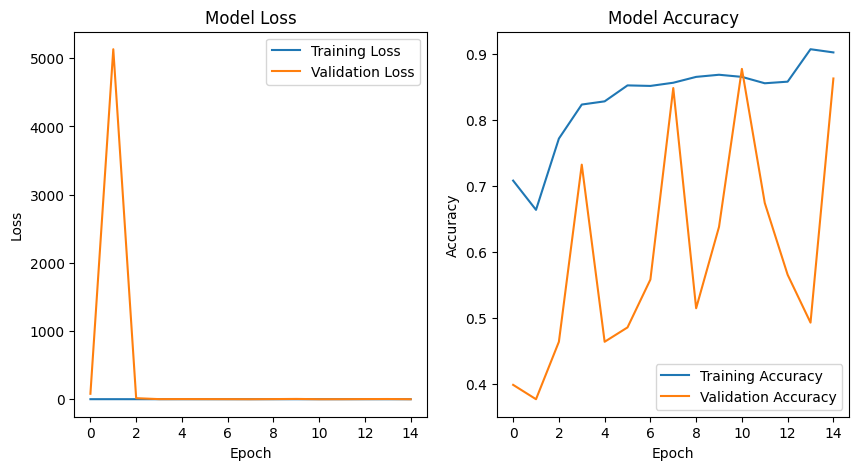

161/161 [==============================] - 11s 62ms/step
precision:  0.8244036450165045
recall:  0.9011222200805808
F1 score:  0.8405791223051766


In [ ]:
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

dropout=tf.keras.layers.Dropout(.8)(avg)

output = tf.keras.layers.Dense(3, activation="softmax")(dropout)


base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=dropout_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

base_model.evaluate(test_data_generator)


y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Number of Layers

In [ ]:
layer_epoch=15

Layer Structure 1 (1024)

Epoch 1/15
156/156 [==============================] - 29s 161ms/step - loss: 0.9383 - sparse_categorical_accuracy: 0.6087 - val_loss: 417.1534 - val_sparse_categorical_accuracy: 0.3188
Epoch 2/15
156/156 [==============================] - 24s 154ms/step - loss: 0.6623 - sparse_categorical_accuracy: 0.7359 - val_loss: 0.7538 - val_sparse_categorical_accuracy: 0.5942
Epoch 3/15
156/156 [==============================] - 25s 160ms/step - loss: 0.5309 - sparse_categorical_accuracy: 0.8068 - val_loss: 0.6433 - val_sparse_categorical_accuracy: 0.7101
Epoch 4/15
156/156 [==============================] - 24s 155ms/step - loss: 0.4524 - sparse_categorical_accuracy: 0.8527 - val_loss: 1.8408 - val_sparse_categorical_accuracy: 0.6812
Epoch 5/15
156/156 [==============================] - 24s 154ms/step - loss: 0.4018 - sparse_categorical_accuracy: 0.8639 - val_loss: 0.6956 - val_sparse_categorical_accuracy: 0.7681
Epoch 6/15
156/156 [==============================] - 25s 156ms/step - loss: 0.4115

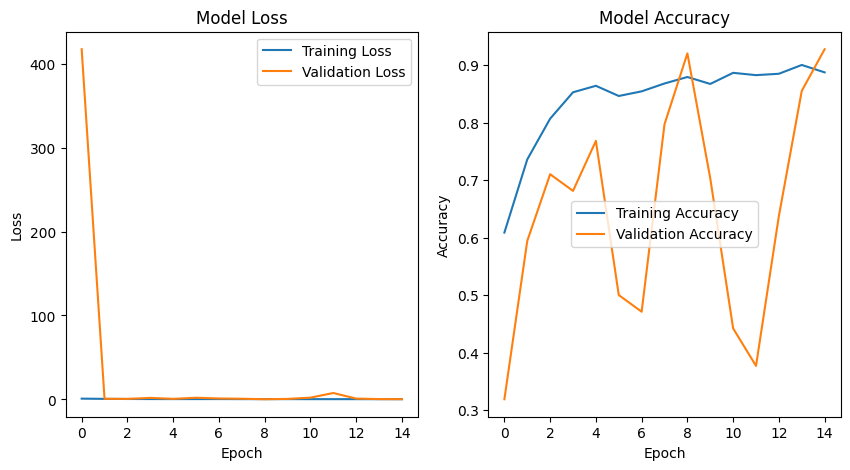

161/161 [==============================] - 11s 63ms/step
precision:  0.8074633817594306
recall:  0.8996353484482325
F1 score:  0.8394428797746875


In [ ]:
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

dropout=tf.keras.layers.Dropout(.5)(avg)


hl1 = tf.keras.layers.Dense(1024, activation="relu")(dropout)

output = tf.keras.layers.Dense(3, activation="softmax")(hl1)


base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=layer_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Layer Structure 2 (1024)(512)

Epoch 1/15
156/156 [==============================] - 45s 228ms/step - loss: 0.7324 - sparse_categorical_accuracy: 0.7383 - val_loss: 1.3835 - val_sparse_categorical_accuracy: 0.4275
Epoch 2/15
156/156 [==============================] - 24s 149ms/step - loss: 0.5521 - sparse_categorical_accuracy: 0.8116 - val_loss: 0.5539 - val_sparse_categorical_accuracy: 0.8333
Epoch 3/15
156/156 [==============================] - 23s 148ms/step - loss: 0.5894 - sparse_categorical_accuracy: 0.7818 - val_loss: 1.0343 - val_sparse_categorical_accuracy: 0.8768
Epoch 4/15
156/156 [==============================] - 23s 149ms/step - loss: 0.4381 - sparse_categorical_accuracy: 0.8382 - val_loss: 0.4963 - val_sparse_categorical_accuracy: 0.8116
Epoch 5/15
156/156 [==============================] - 24s 154ms/step - loss: 0.4880 - sparse_categorical_accuracy: 0.8438 - val_loss: 0.4347 - val_sparse_categorical_accuracy: 0.8406
Epoch 6/15
156/156 [==============================] - 24s 154ms/step - loss: 0.3777 -

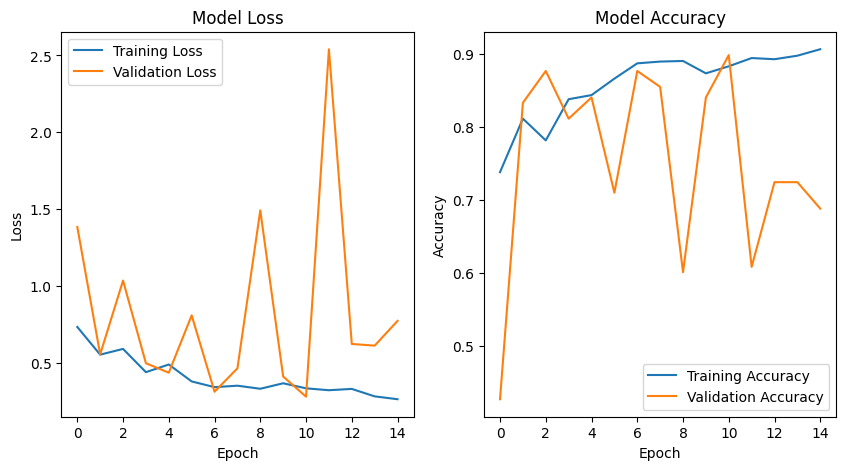

161/161 [==============================] - 11s 63ms/step
precision:  0.6747223337347785
recall:  0.5984540741970594
F1 score:  0.4267631545326787


In [ ]:
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

dropout=tf.keras.layers.Dropout(.5)(avg)


hl1 = tf.keras.layers.Dense(1024, activation="relu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="relu")(hl1)

output = tf.keras.layers.Dense(3, activation="softmax")(hl2)


base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=layer_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

base_model.evaluate(test_data_generator)


y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Layer Structure 3 (1024)(1024)

Epoch 1/15
156/156 [==============================] - 29s 160ms/step - loss: 0.9245 - sparse_categorical_accuracy: 0.6506 - val_loss: 4.3356 - val_sparse_categorical_accuracy: 0.3623
Epoch 2/15
156/156 [==============================] - 24s 155ms/step - loss: 0.7389 - sparse_categorical_accuracy: 0.7214 - val_loss: 12.0058 - val_sparse_categorical_accuracy: 0.3188
Epoch 3/15
156/156 [==============================] - 25s 158ms/step - loss: 0.5816 - sparse_categorical_accuracy: 0.7818 - val_loss: 2.4653 - val_sparse_categorical_accuracy: 0.4203
Epoch 4/15
156/156 [==============================] - 24s 153ms/step - loss: 0.5187 - sparse_categorical_accuracy: 0.8100 - val_loss: 0.6764 - val_sparse_categorical_accuracy: 0.8188
Epoch 5/15
156/156 [==============================] - 24s 155ms/step - loss: 0.4786 - sparse_categorical_accuracy: 0.8196 - val_loss: 3.1620 - val_sparse_categorical_accuracy: 0.5435
Epoch 6/15
156/156 [==============================] - 24s 156ms/step - loss: 0.4148 

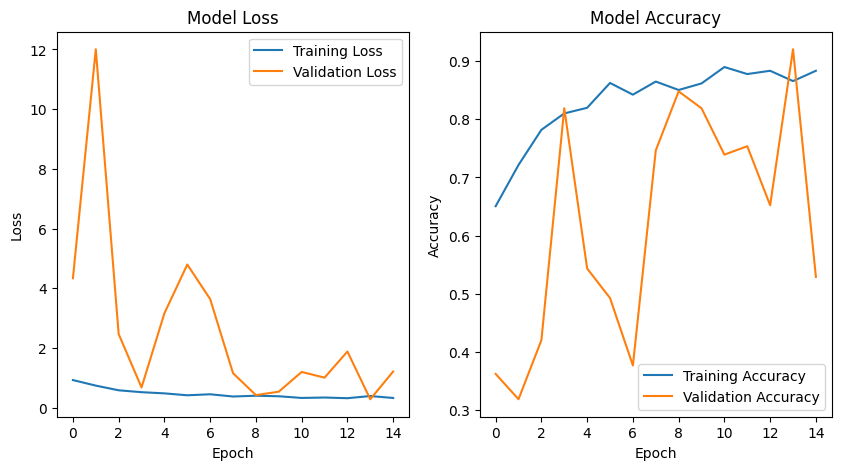

161/161 [==============================] - 11s 62ms/step
precision:  0.4873983489614324
recall:  0.526907348989368
F1 score:  0.25292480525520283


In [ ]:
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)


avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

dropout=tf.keras.layers.Dropout(.5)(avg)


hl1 = tf.keras.layers.Dense(1024, activation="relu")(dropout)
hl2 = tf.keras.layers.Dense(1024, activation="relu")(hl1)

output = tf.keras.layers.Dense(3, activation="softmax")(hl2)


base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=layer_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

base_model.evaluate(test_data_generator)


y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Layer Structure 4 (1024)(512)(256)

Epoch 1/15
156/156 [==============================] - 29s 160ms/step - loss: 0.8288 - sparse_categorical_accuracy: 0.6691 - val_loss: 57.3950 - val_sparse_categorical_accuracy: 0.3188
Epoch 2/15
156/156 [==============================] - 24s 155ms/step - loss: 0.7755 - sparse_categorical_accuracy: 0.6804 - val_loss: 43.2383 - val_sparse_categorical_accuracy: 0.3188
Epoch 3/15
156/156 [==============================] - 25s 159ms/step - loss: 0.6131 - sparse_categorical_accuracy: 0.7705 - val_loss: 10.3417 - val_sparse_categorical_accuracy: 0.3261
Epoch 4/15
156/156 [==============================] - 25s 158ms/step - loss: 0.5344 - sparse_categorical_accuracy: 0.8052 - val_loss: 2.9676 - val_sparse_categorical_accuracy: 0.6159
Epoch 5/15
156/156 [==============================] - 25s 156ms/step - loss: 0.4986 - sparse_categorical_accuracy: 0.8325 - val_loss: 0.5311 - val_sparse_categorical_accuracy: 0.8188
Epoch 6/15
156/156 [==============================] - 25s 158ms/step - loss: 0.476

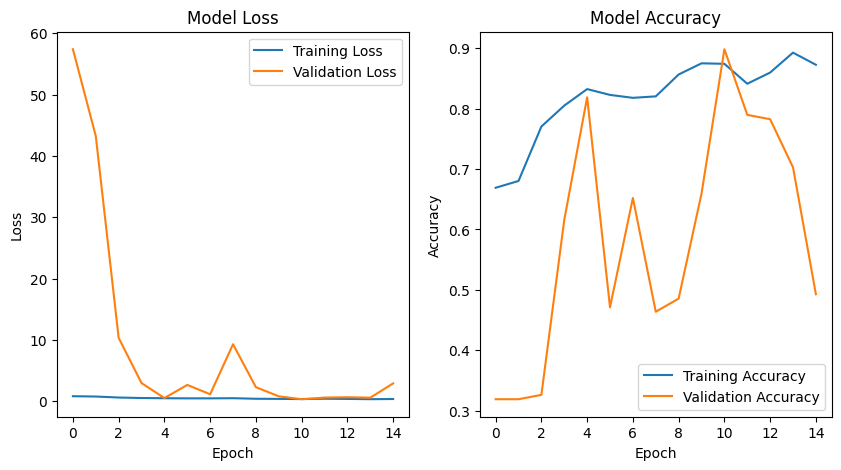

161/161 [==============================] - 11s 62ms/step
precision:  0.6155707964218603
recall:  0.440824763057068
F1 score:  0.2774522145622149


In [ ]:
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

dropout=tf.keras.layers.Dropout(.5)(avg)


hl1 = tf.keras.layers.Dense(1024, activation="relu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="relu")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="relu")(hl2)

output = tf.keras.layers.Dense(3, activation="softmax")(hl3)


base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=layer_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Layer Structure 5 (1024)(1024)(1024)

Epoch 1/15
156/156 [==============================] - 29s 162ms/step - loss: 0.8999 - sparse_categorical_accuracy: 0.6304 - val_loss: 4.8383 - val_sparse_categorical_accuracy: 0.3768
Epoch 2/15
156/156 [==============================] - 24s 154ms/step - loss: 0.8092 - sparse_categorical_accuracy: 0.6208 - val_loss: 5.2124 - val_sparse_categorical_accuracy: 0.3768
Epoch 3/15
156/156 [==============================] - 25s 158ms/step - loss: 0.7255 - sparse_categorical_accuracy: 0.6836 - val_loss: 1.5583 - val_sparse_categorical_accuracy: 0.7319
Epoch 4/15
156/156 [==============================] - 25s 159ms/step - loss: 0.6320 - sparse_categorical_accuracy: 0.7367 - val_loss: 1.3147 - val_sparse_categorical_accuracy: 0.4928
Epoch 5/15
156/156 [==============================] - 24s 156ms/step - loss: 0.5618 - sparse_categorical_accuracy: 0.7923 - val_loss: 3.2514 - val_sparse_categorical_accuracy: 0.6812
Epoch 6/15
156/156 [==============================] - 25s 158ms/step - loss: 0.5083 -

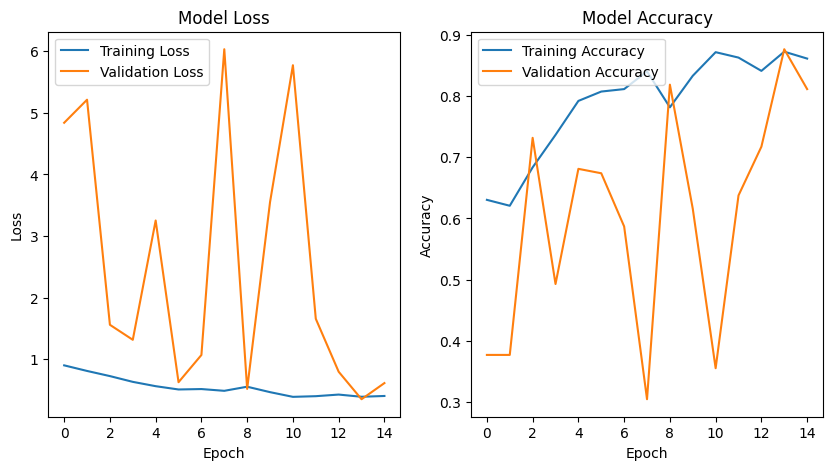

161/161 [==============================] - 11s 63ms/step
precision:  0.895430535946154
recall:  0.8430491650885314
F1 score:  0.852621947569164


In [ ]:
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

dropout=tf.keras.layers.Dropout(.5)(avg)


hl1 = tf.keras.layers.Dense(1024, activation="relu")(dropout)
hl2 = tf.keras.layers.Dense(1024, activation="relu")(hl1)
hl3 = tf.keras.layers.Dense(1024, activation="relu")(hl2)

output = tf.keras.layers.Dense(3, activation="softmax")(hl3)


base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=layer_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Layer Structure 5 (1024)(512)(256)(128)

Epoch 1/15
156/156 [==============================] - 35s 179ms/step - loss: 0.8147 - sparse_categorical_accuracy: 0.6755 - val_loss: 3.0146 - val_sparse_categorical_accuracy: 0.3696
Epoch 2/15
156/156 [==============================] - 23s 150ms/step - loss: 0.6628 - sparse_categorical_accuracy: 0.7528 - val_loss: 8.5402 - val_sparse_categorical_accuracy: 0.3188
Epoch 3/15
156/156 [==============================] - 24s 151ms/step - loss: 0.6433 - sparse_categorical_accuracy: 0.7544 - val_loss: 22.5607 - val_sparse_categorical_accuracy: 0.3406
Epoch 4/15
156/156 [==============================] - 24s 150ms/step - loss: 0.6063 - sparse_categorical_accuracy: 0.7786 - val_loss: 5.1656 - val_sparse_categorical_accuracy: 0.6449
Epoch 5/15
156/156 [==============================] - 24s 151ms/step - loss: 0.6212 - sparse_categorical_accuracy: 0.7818 - val_loss: 3.4767 - val_sparse_categorical_accuracy: 0.6304
Epoch 6/15
156/156 [==============================] - 24s 152ms/step - loss: 0.5051 

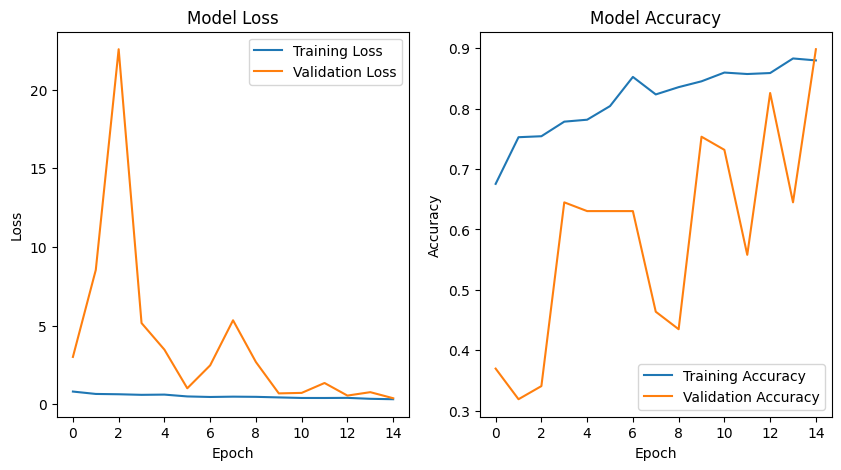

161/161 [==============================] - 11s 62ms/step
precision:  0.857283776642593
recall:  0.883110910093683
F1 score:  0.8689483136210779


In [ ]:
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

dropout=tf.keras.layers.Dropout(.5)(avg)


hl1 = tf.keras.layers.Dense(1024, activation="relu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="relu")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="relu")(hl2)
hl4 = tf.keras.layers.Dense(128, activation="relu")(hl3)

output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=layer_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

base_model.evaluate(test_data_generator)


y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Layer Structure 6 (1024)(1024)(1024)(1024)

Epoch 1/15
156/156 [==============================] - 28s 158ms/step - loss: 0.9045 - sparse_categorical_accuracy: 0.6087 - val_loss: 496.3281 - val_sparse_categorical_accuracy: 0.3188
Epoch 2/15
156/156 [==============================] - 24s 155ms/step - loss: 0.8239 - sparse_categorical_accuracy: 0.6465 - val_loss: 4.5544 - val_sparse_categorical_accuracy: 0.5435
Epoch 3/15
156/156 [==============================] - 25s 158ms/step - loss: 0.7228 - sparse_categorical_accuracy: 0.6683 - val_loss: 64.6347 - val_sparse_categorical_accuracy: 0.3333
Epoch 4/15
156/156 [==============================] - 24s 155ms/step - loss: 0.7114 - sparse_categorical_accuracy: 0.6530 - val_loss: 1.1581 - val_sparse_categorical_accuracy: 0.6957
Epoch 5/15
156/156 [==============================] - 25s 156ms/step - loss: 0.6982 - sparse_categorical_accuracy: 0.7085 - val_loss: 11.0367 - val_sparse_categorical_accuracy: 0.5797
Epoch 6/15
156/156 [==============================] - 25s 158ms/step - loss: 0.60

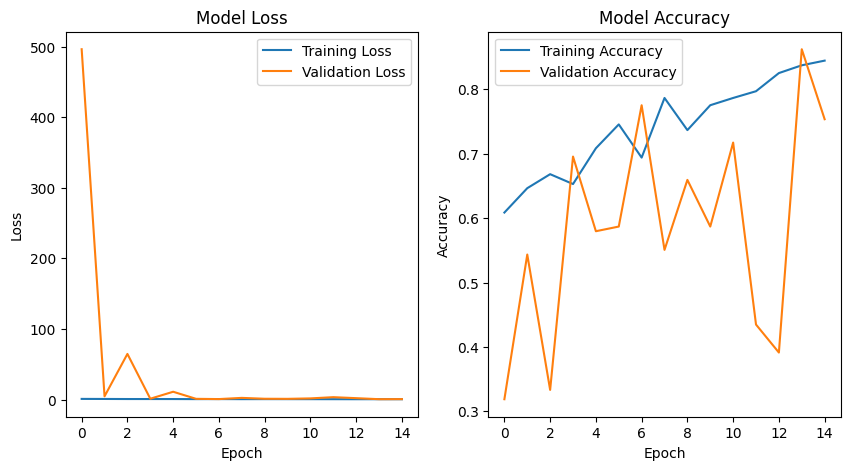

161/161 [==============================] - 10s 62ms/step
precision:  0.6705921885193714
recall:  0.7128119984503846
F1 score:  0.5954463373111683


In [ ]:
#Initialsing an inceptionet CNN with pretrained imagenet weights and keeping all layers trainable
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

#Pooling the layers from the CNN to be fed to the DNN structure
avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

#adding dropout
dropout=tf.keras.layers.Dropout(.5)(avg)


#Hidden layers
hl1 = tf.keras.layers.Dense(1024, activation="relu")(dropout)
hl2 = tf.keras.layers.Dense(1024, activation="relu")(hl1)
hl3 = tf.keras.layers.Dense(1024, activation="relu")(hl2)
hl4 = tf.keras.layers.Dense(1024, activation="relu")(hl3)

# The final softmax layer as we only have 3 classes
output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


# Making the model with inputs as the CNN and output as the classification output layer
base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

# Compiling the model
base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=layer_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

# Create subplots for the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Activation Function

In [ ]:
activation_epoch=15

 Relu

Epoch 1/15
156/156 [==============================] - 28s 155ms/step - loss: 0.8384 - sparse_categorical_accuracy: 0.6216 - val_loss: 135.7654 - val_sparse_categorical_accuracy: 0.3261
Epoch 2/15
156/156 [==============================] - 24s 151ms/step - loss: 0.7267 - sparse_categorical_accuracy: 0.6892 - val_loss: 174.3490 - val_sparse_categorical_accuracy: 0.3261
Epoch 3/15
156/156 [==============================] - 24s 155ms/step - loss: 0.6662 - sparse_categorical_accuracy: 0.7391 - val_loss: 1.2221 - val_sparse_categorical_accuracy: 0.3768
Epoch 4/15
156/156 [==============================] - 24s 156ms/step - loss: 0.5917 - sparse_categorical_accuracy: 0.7923 - val_loss: 0.9196 - val_sparse_categorical_accuracy: 0.6087
Epoch 5/15
156/156 [==============================] - 24s 153ms/step - loss: 0.5288 - sparse_categorical_accuracy: 0.8052 - val_loss: 4.7800 - val_sparse_categorical_accuracy: 0.3913
Epoch 6/15
156/156 [==============================] - 25s 157ms/step - loss: 0.50

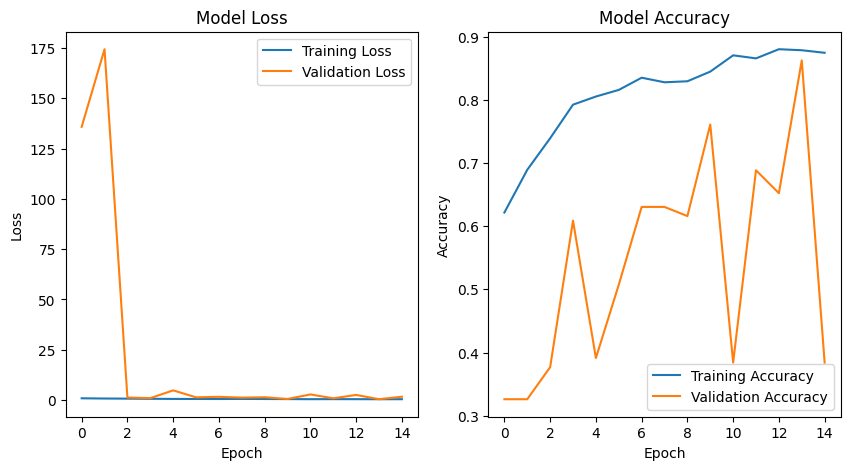

161/161 [==============================] - 11s 63ms/step
precision:  0.24842019578861685
recall:  0.3563352826510721
F1 score:  0.10047677397435628


C:\Users\yashs\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Initialsing an inceptionet CNN with pretrained imagenet weights and keeping all layers trainable
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

#Pooling the layers from the CNN to be fed to the DNN structure
avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

#adding dropout
dropout=tf.keras.layers.Dropout(.5)(avg)


#Hidden layers
hl1 = tf.keras.layers.Dense(1024, activation="relu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="relu")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="relu")(hl2)
hl4 = tf.keras.layers.Dense(128, activation="relu")(hl3)

# The final softmax layer as we only have 3 classes
output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


# Making the model with inputs as the CNN and output as the classification output layer
base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

# Compiling the model
base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=activation_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

# Create subplots for the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

 LeakyReLU

Epoch 1/15
156/156 [==============================] - 30s 166ms/step - loss: 0.9378 - sparse_categorical_accuracy: 0.6280 - val_loss: 37.3202 - val_sparse_categorical_accuracy: 0.3043
Epoch 2/15
156/156 [==============================] - 25s 157ms/step - loss: 0.8188 - sparse_categorical_accuracy: 0.6852 - val_loss: 1.6957 - val_sparse_categorical_accuracy: 0.5362
Epoch 3/15
156/156 [==============================] - 25s 161ms/step - loss: 0.7559 - sparse_categorical_accuracy: 0.7295 - val_loss: 1.8483 - val_sparse_categorical_accuracy: 0.3043
Epoch 4/15
156/156 [==============================] - 25s 163ms/step - loss: 0.7071 - sparse_categorical_accuracy: 0.7246 - val_loss: 3.9097 - val_sparse_categorical_accuracy: 0.3188
Epoch 5/15
156/156 [==============================] - 25s 159ms/step - loss: 0.6613 - sparse_categorical_accuracy: 0.7552 - val_loss: 1.5503 - val_sparse_categorical_accuracy: 0.5217
Epoch 6/15
156/156 [==============================] - 25s 162ms/step - loss: 0.6836 

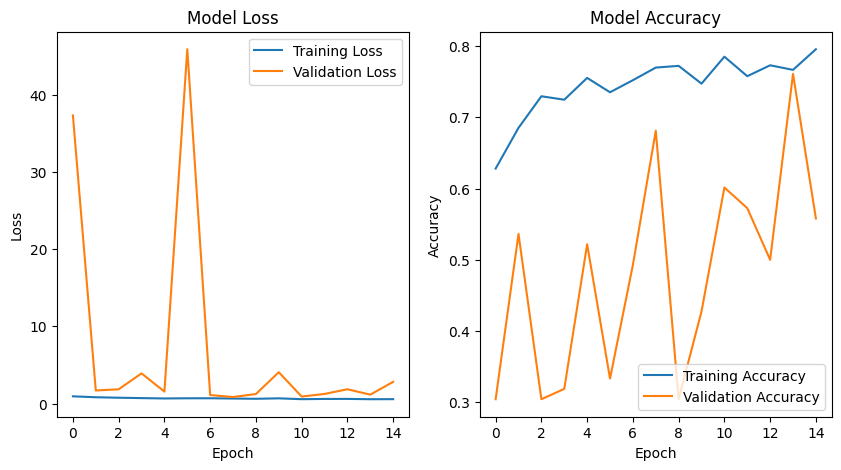

161/161 [==============================] - 11s 64ms/step
precision:  0.7282223313151149
recall:  0.54809903882711
F1 score:  0.4819357705737038


In [ ]:
#Initialsing an inceptionet CNN with pretrained imagenet weights and keeping all layers trainable
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

#Pooling the layers from the CNN to be fed to the DNN structure
avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

#adding dropout
dropout=tf.keras.layers.Dropout(.5)(avg)


#Hidden layers
hl1 = tf.keras.layers.Dense(1024, activation="LeakyReLU")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="LeakyReLU")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="LeakyReLU")(hl2)
hl4 = tf.keras.layers.Dense(128, activation="LeakyReLU")(hl3)


# The final softmax layer as we only have 3 classes
output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


# Making the model with inputs as the CNN and output as the classification output layer
base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

# Compiling the model
base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=activation_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

# Create subplots for the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

ELU

Epoch 1/15
156/156 [==============================] - 35s 181ms/step - loss: 0.9413 - sparse_categorical_accuracy: 0.6385 - val_loss: 139.7337 - val_sparse_categorical_accuracy: 0.3333
Epoch 2/15
156/156 [==============================] - 25s 157ms/step - loss: 0.6780 - sparse_categorical_accuracy: 0.7544 - val_loss: 9.5930 - val_sparse_categorical_accuracy: 0.5797
Epoch 3/15
156/156 [==============================] - 25s 160ms/step - loss: 0.8474 - sparse_categorical_accuracy: 0.6369 - val_loss: 18.8104 - val_sparse_categorical_accuracy: 0.3768
Epoch 4/15
156/156 [==============================] - 25s 156ms/step - loss: 0.7636 - sparse_categorical_accuracy: 0.6900 - val_loss: 5.8099 - val_sparse_categorical_accuracy: 0.5000
Epoch 5/15
156/156 [==============================] - 25s 158ms/step - loss: 0.8140 - sparse_categorical_accuracy: 0.6449 - val_loss: 2.2090 - val_sparse_categorical_accuracy: 0.4348
Epoch 6/15
156/156 [==============================] - 25s 162ms/step - loss: 0.647

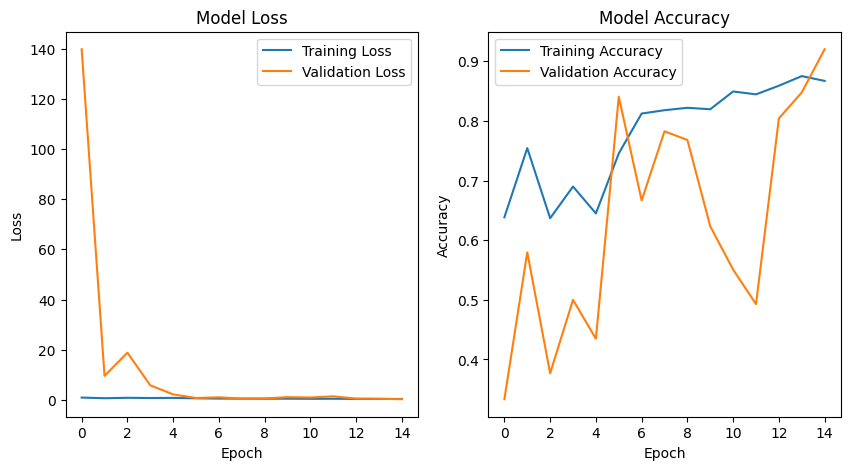

161/161 [==============================] - 11s 66ms/step
precision:  0.8588934413287861
recall:  0.918841948774907
F1 score:  0.8827748747809739


In [ ]:
#Initialsing an inceptionet CNN with pretrained imagenet weights and keeping all layers trainable
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)
#Pooling the layers from the CNN to be fed to the DNN structure
avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

#adding dropout
dropout=tf.keras.layers.Dropout(.5)(avg)


#Hidden layers
hl1 = tf.keras.layers.Dense(1024, activation="elu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="elu")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="elu")(hl2)
hl4 = tf.keras.layers.Dense(128, activation="elu")(hl3)

# The final softmax layer as we only have 3 classes
output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


# Making the model with inputs as the CNN and output as the classification output layer
base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

# Compiling the model
base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=activation_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

# Create subplots for the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Optimizers

In [ ]:
opt_epoch=15

Adam

Epoch 1/15
156/156 [==============================] - 48s 221ms/step - loss: 0.8643 - sparse_categorical_accuracy: 0.6602 - val_loss: 2610.7085 - val_sparse_categorical_accuracy: 0.3188
Epoch 2/15
156/156 [==============================] - 24s 154ms/step - loss: 0.6227 - sparse_categorical_accuracy: 0.7754 - val_loss: 2.0178 - val_sparse_categorical_accuracy: 0.7101
Epoch 3/15
156/156 [==============================] - 23s 147ms/step - loss: 0.5843 - sparse_categorical_accuracy: 0.7907 - val_loss: 2.2907 - val_sparse_categorical_accuracy: 0.5580
Epoch 4/15
156/156 [==============================] - 23s 146ms/step - loss: 0.5283 - sparse_categorical_accuracy: 0.7947 - val_loss: 6.0557 - val_sparse_categorical_accuracy: 0.3768
Epoch 5/15
156/156 [==============================] - 24s 150ms/step - loss: 0.5404 - sparse_categorical_accuracy: 0.7931 - val_loss: 0.7909 - val_sparse_categorical_accuracy: 0.6594
Epoch 6/15
156/156 [==============================] - 23s 146ms/step - loss: 0.441

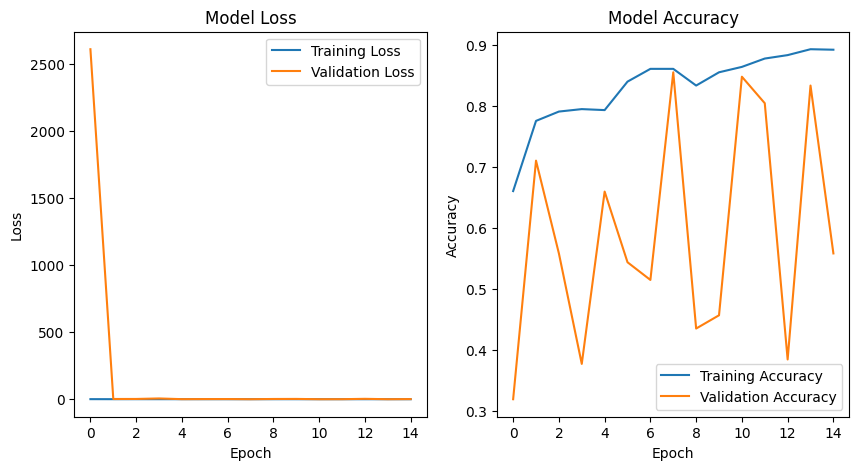

161/161 [==============================] - 11s 62ms/step
precision:  0.6721098229395569
recall:  0.5799816539790318
F1 score:  0.41041738921949933


In [ ]:
#Initialsing an inceptionet CNN with pretrained imagenet weights and keeping all layers trainable
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

#Pooling the layers from the CNN to be fed to the DNN structure
avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

#adding dropout
dropout=tf.keras.layers.Dropout(.5)(avg)


#Hidden layers
hl1 = tf.keras.layers.Dense(1024, activation="elu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="elu")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="elu")(hl2)
hl4 = tf.keras.layers.Dense(128, activation="elu")(hl3)

# The final softmax layer as we only have 3 classes
output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


# Making the model with inputs as the CNN and output as the classification output layer
base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

# Compiling the model
base_model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=opt_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

# Create subplots for the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Adagrad

Epoch 1/15
156/156 [==============================] - 27s 154ms/step - loss: 0.5041 - sparse_categorical_accuracy: 0.7907 - val_loss: 0.3150 - val_sparse_categorical_accuracy: 0.8768
Epoch 2/15
156/156 [==============================] - 24s 153ms/step - loss: 0.2984 - sparse_categorical_accuracy: 0.8833 - val_loss: 0.1921 - val_sparse_categorical_accuracy: 0.8986
Epoch 3/15
156/156 [==============================] - 23s 148ms/step - loss: 0.2145 - sparse_categorical_accuracy: 0.9211 - val_loss: 0.1281 - val_sparse_categorical_accuracy: 0.9203
Epoch 4/15
156/156 [==============================] - 24s 156ms/step - loss: 0.1709 - sparse_categorical_accuracy: 0.9356 - val_loss: 0.1142 - val_sparse_categorical_accuracy: 0.9493
Epoch 5/15
156/156 [==============================] - 24s 153ms/step - loss: 0.1688 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.2284 - val_sparse_categorical_accuracy: 0.9348
Epoch 6/15
156/156 [==============================] - 24s 151ms/step - loss: 0.1220 -

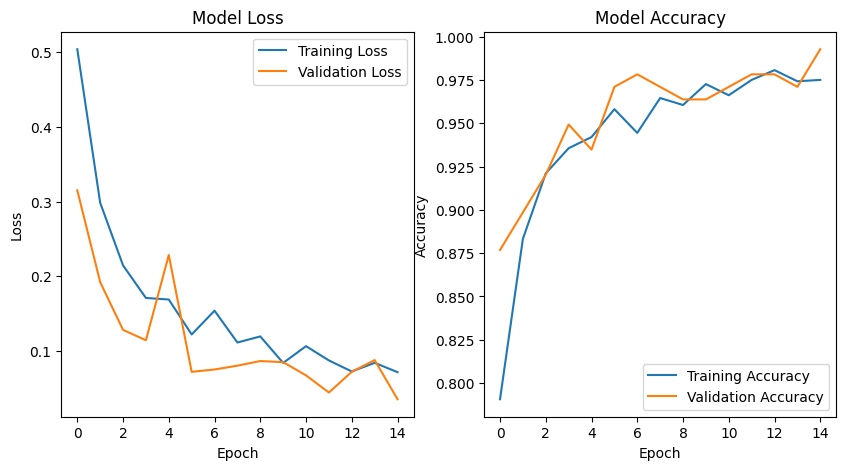

161/161 [==============================] - 10s 61ms/step
precision:  0.9495192868602084
recall:  0.9676259417655904
F1 score:  0.9576469232549631


In [ ]:


#Initialsing an inceptionet CNN with pretrained imagenet weights and keeping all layers trainable
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

#Pooling the layers from the CNN to be fed to the DNN structure
avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

#adding dropout
dropout=tf.keras.layers.Dropout(.5)(avg)


#Hidden layers
hl1 = tf.keras.layers.Dense(1024, activation="elu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="elu")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="elu")(hl2)
hl4 = tf.keras.layers.Dense(128, activation="elu")(hl3)


# The final softmax layer as we only have 3 classes
output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


# Making the model with inputs as the CNN and output as the classification output layer
base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

# Compiling the model
base_model.compile(optimizer = tf.keras.optimizers.Adagrad(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=opt_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

# Create subplots for the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

RMSprop

Epoch 1/15
156/156 [==============================] - 34s 174ms/step - loss: 1.3376 - sparse_categorical_accuracy: 0.3696 - val_loss: 299447.2500 - val_sparse_categorical_accuracy: 0.3188
Epoch 2/15
156/156 [==============================] - 27s 173ms/step - loss: 1.1747 - sparse_categorical_accuracy: 0.3929 - val_loss: 2454.5166 - val_sparse_categorical_accuracy: 0.3768
Epoch 3/15
156/156 [==============================] - 27s 175ms/step - loss: 1.0799 - sparse_categorical_accuracy: 0.4686 - val_loss: 2.1717 - val_sparse_categorical_accuracy: 0.3913
Epoch 4/15
156/156 [==============================] - 28s 177ms/step - loss: 1.0596 - sparse_categorical_accuracy: 0.4557 - val_loss: 1.0780 - val_sparse_categorical_accuracy: 0.4493
Epoch 5/15
156/156 [==============================] - 28s 176ms/step - loss: 0.9451 - sparse_categorical_accuracy: 0.5652 - val_loss: 1.1335 - val_sparse_categorical_accuracy: 0.4855
Epoch 6/15
156/156 [==============================] - 28s 181ms/step - loss: 

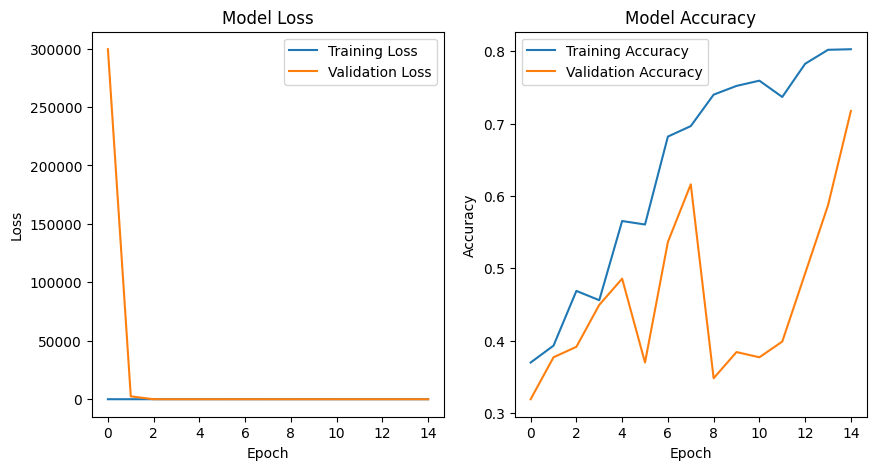

161/161 [==============================] - 11s 63ms/step
precision:  0.6355818841325752
recall:  0.7551415932412343
F1 score:  0.6318985030368166


In [ ]:

#Initialsing an inceptionet CNN with pretrained imagenet weights and keeping all layers trainable
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

#Pooling the layers from the CNN to be fed to the DNN structure
avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

#adding dropout
dropout=tf.keras.layers.Dropout(.5)(avg)


#Hidden layers
hl1 = tf.keras.layers.Dense(1024, activation="elu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="elu")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="elu")(hl2)
hl4 = tf.keras.layers.Dense(128, activation="elu")(hl3)

# The final softmax layer as we only have 3 classes
output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


# Making the model with inputs as the CNN and output as the classification output layer
base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

# Compiling the model
base_model.compile(optimizer = tf.keras.optimizers.RMSprop(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=opt_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

# Create subplots for the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

SGD+M

Epoch 1/15
156/156 [==============================] - 28s 159ms/step - loss: 0.6625 - sparse_categorical_accuracy: 0.7472 - val_loss: 0.9085 - val_sparse_categorical_accuracy: 0.7609
Epoch 2/15
156/156 [==============================] - 24s 154ms/step - loss: 0.3837 - sparse_categorical_accuracy: 0.8647 - val_loss: 3.5393 - val_sparse_categorical_accuracy: 0.3768
Epoch 3/15
156/156 [==============================] - 24s 156ms/step - loss: 0.4006 - sparse_categorical_accuracy: 0.8663 - val_loss: 0.9726 - val_sparse_categorical_accuracy: 0.7319
Epoch 4/15
156/156 [==============================] - 24s 155ms/step - loss: 0.3215 - sparse_categorical_accuracy: 0.8937 - val_loss: 1.1531 - val_sparse_categorical_accuracy: 0.6667
Epoch 5/15
156/156 [==============================] - 24s 151ms/step - loss: 0.3127 - sparse_categorical_accuracy: 0.8792 - val_loss: 0.2826 - val_sparse_categorical_accuracy: 0.9130
Epoch 6/15
156/156 [==============================] - 24s 151ms/step - loss: 0.2956 -

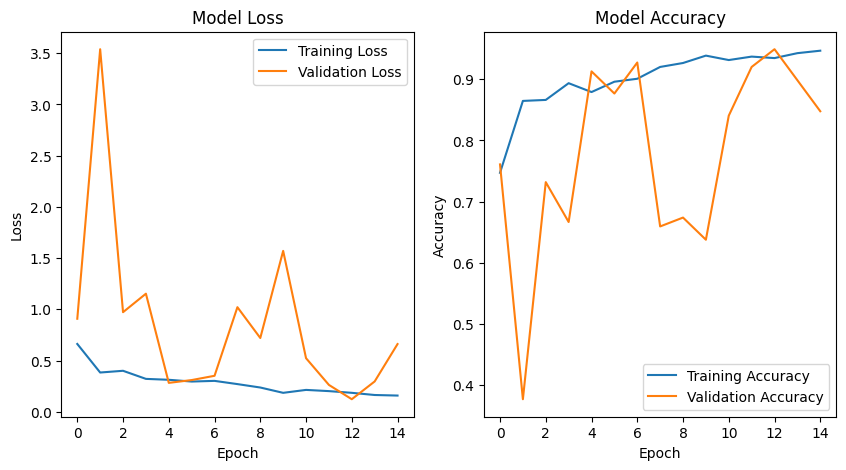

161/161 [==============================] - 10s 61ms/step
precision:  0.6801598939324612
recall:  0.8495594049968948
F1 score:  0.6984159098402422


In [ ]:

#Initialsing an inceptionet CNN with pretrained imagenet weights and keeping all layers trainable
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)
#Pooling the layers from the CNN to be fed to the DNN structure
avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

#adding dropout
dropout=tf.keras.layers.Dropout(.5)(avg)


#Hidden layers
hl1 = tf.keras.layers.Dense(1024, activation="elu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="elu")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="elu")(hl2)
hl4 = tf.keras.layers.Dense(128, activation="elu")(hl3)

# The final softmax layer as we only have 3 classes
output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


# Making the model with inputs as the CNN and output as the classification output layer
base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

# Compiling the model
base_model.compile(optimizer = tf.keras.optimizers.SGD(momentum=0.9),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=opt_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

# Create subplots for the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Learning Rate

In [ ]:
lr_epoch=15

lr=0.1

Epoch 1/15
156/156 [==============================] - 35s 179ms/step - loss: 0.4662 - sparse_categorical_accuracy: 0.8301 - val_loss: 0.9440 - val_sparse_categorical_accuracy: 0.7246
Epoch 2/15
156/156 [==============================] - 23s 149ms/step - loss: 0.2794 - sparse_categorical_accuracy: 0.9026 - val_loss: 0.3419 - val_sparse_categorical_accuracy: 0.8406
Epoch 3/15
156/156 [==============================] - 24s 153ms/step - loss: 0.2003 - sparse_categorical_accuracy: 0.9251 - val_loss: 0.2591 - val_sparse_categorical_accuracy: 0.8986
Epoch 4/15
156/156 [==============================] - 23s 148ms/step - loss: 0.2140 - sparse_categorical_accuracy: 0.9324 - val_loss: 0.1931 - val_sparse_categorical_accuracy: 0.9275
Epoch 5/15
156/156 [==============================] - 23s 147ms/step - loss: 0.1639 - sparse_categorical_accuracy: 0.9444 - val_loss: 0.2947 - val_sparse_categorical_accuracy: 0.9058
Epoch 6/15
156/156 [==============================] - 24s 151ms/step - loss: 0.1391 -

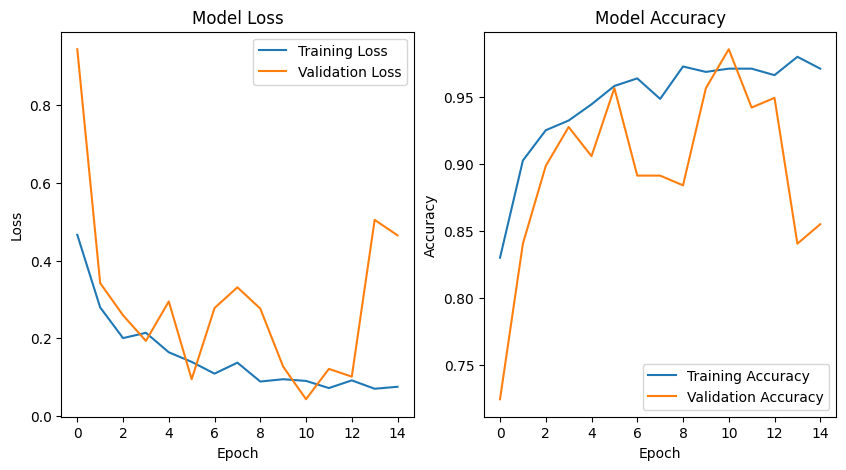

161/161 [==============================] - 10s 61ms/step
precision:  0.9537433920387297
recall:  0.9009205453170255
F1 score:  0.9197030563263505


In [ ]:
#Initialsing an inceptionet CNN with pretrained imagenet weights and keeping all layers trainable
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

#Pooling the layers from the CNN to be fed to the DNN structure
avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

#adding dropout
dropout=tf.keras.layers.Dropout(.5)(avg)


#Hidden layers
hl1 = tf.keras.layers.Dense(1024, activation="elu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="elu")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="elu")(hl2)
hl4 = tf.keras.layers.Dense(128, activation="elu")(hl3)

# The final softmax layer as we only have 3 classes
output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


# Making the model with inputs as the CNN and output as the classification output layer
base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

# Compiling the model
base_model.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=lr_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

# Create subplots for the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

lr=0.01

Epoch 1/15
156/156 [==============================] - 27s 155ms/step - loss: 0.4729 - sparse_categorical_accuracy: 0.8366 - val_loss: 0.5828 - val_sparse_categorical_accuracy: 0.7681
Epoch 2/15
156/156 [==============================] - 24s 150ms/step - loss: 0.2731 - sparse_categorical_accuracy: 0.9042 - val_loss: 0.2535 - val_sparse_categorical_accuracy: 0.9058
Epoch 3/15
156/156 [==============================] - 24s 153ms/step - loss: 0.1987 - sparse_categorical_accuracy: 0.9235 - val_loss: 0.2451 - val_sparse_categorical_accuracy: 0.8913
Epoch 4/15
156/156 [==============================] - 24s 152ms/step - loss: 0.1897 - sparse_categorical_accuracy: 0.9300 - val_loss: 0.1360 - val_sparse_categorical_accuracy: 0.9493
Epoch 5/15
156/156 [==============================] - 24s 151ms/step - loss: 0.1552 - sparse_categorical_accuracy: 0.9541 - val_loss: 0.0987 - val_sparse_categorical_accuracy: 0.9710
Epoch 6/15
156/156 [==============================] - 24s 152ms/step - loss: 0.1307 -

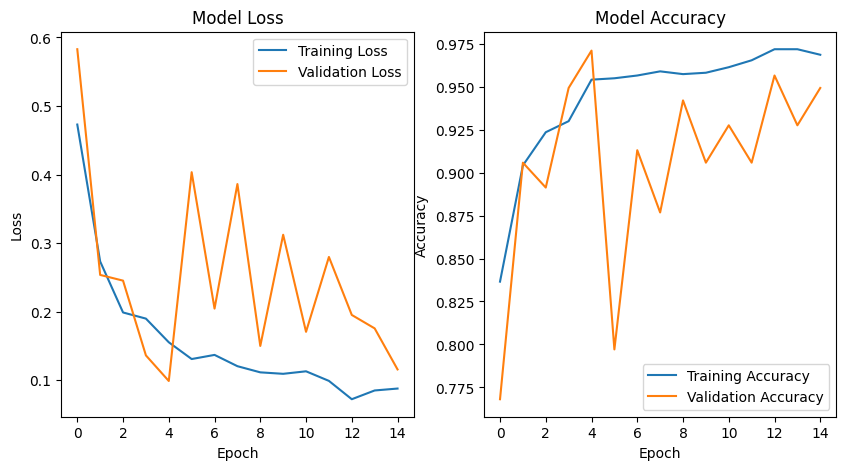

161/161 [==============================] - 10s 62ms/step
precision:  0.9380515841946432
recall:  0.9591313438969266
F1 score:  0.9472349889930944


In [ ]:
#Initialsing an inceptionet CNN with pretrained imagenet weights and keeping all layers trainable
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

#Pooling the layers from the CNN to be fed to the DNN structure
avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

#adding dropout
dropout=tf.keras.layers.Dropout(.5)(avg)


#Hidden layers
hl1 = tf.keras.layers.Dense(1024, activation="elu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="elu")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="elu")(hl2)
hl4 = tf.keras.layers.Dense(128, activation="elu")(hl3)

# The final softmax layer as we only have 3 classes
output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


# Making the model with inputs as the CNN and output as the classification output layer
base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

# Compiling the model
base_model.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=lr_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

# Create subplots for the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

lr=0.001

Epoch 1/15
156/156 [==============================] - 28s 162ms/step - loss: 0.5041 - sparse_categorical_accuracy: 0.7802 - val_loss: 0.2745 - val_sparse_categorical_accuracy: 0.8841
Epoch 2/15
156/156 [==============================] - 25s 159ms/step - loss: 0.3014 - sparse_categorical_accuracy: 0.8994 - val_loss: 0.1287 - val_sparse_categorical_accuracy: 0.9493
Epoch 3/15
156/156 [==============================] - 24s 155ms/step - loss: 0.1960 - sparse_categorical_accuracy: 0.9300 - val_loss: 0.2482 - val_sparse_categorical_accuracy: 0.9058
Epoch 4/15
156/156 [==============================] - 24s 152ms/step - loss: 0.1773 - sparse_categorical_accuracy: 0.9461 - val_loss: 0.1203 - val_sparse_categorical_accuracy: 0.9565
Epoch 5/15
156/156 [==============================] - 24s 152ms/step - loss: 0.1476 - sparse_categorical_accuracy: 0.9461 - val_loss: 0.1407 - val_sparse_categorical_accuracy: 0.9493
Epoch 6/15
156/156 [==============================] - 24s 151ms/step - loss: 0.1369 -

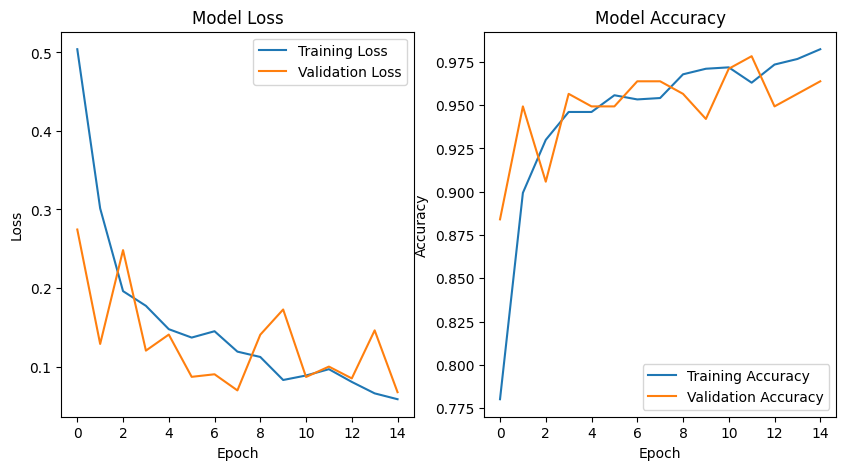

161/161 [==============================] - 10s 62ms/step
precision:  0.9578765659737728
recall:  0.962178920778141
F1 score:  0.9599025602939761


In [ ]:
#Initialsing an inceptionet CNN with pretrained imagenet weights and keeping all layers trainable
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)
#Pooling the layers from the CNN to be fed to the DNN structure
avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

#adding dropout
dropout=tf.keras.layers.Dropout(.5)(avg)


#Hidden layers
hl1 = tf.keras.layers.Dense(1024, activation="elu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="elu")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="elu")(hl2)
hl4 = tf.keras.layers.Dense(128, activation="elu")(hl3)

# The final softmax layer as we only have 3 classes
output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


# Making the model with inputs as the CNN and output as the classification output layer
base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

# Compiling the model
base_model.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=lr_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

# Create subplots for the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

lr=0.0001

Epoch 1/15
156/156 [==============================] - 28s 158ms/step - loss: 1.0125 - sparse_categorical_accuracy: 0.4911 - val_loss: 0.8481 - val_sparse_categorical_accuracy: 0.6812
Epoch 2/15
156/156 [==============================] - 24s 151ms/step - loss: 0.7154 - sparse_categorical_accuracy: 0.6973 - val_loss: 0.7799 - val_sparse_categorical_accuracy: 0.6739
Epoch 3/15
156/156 [==============================] - 24s 152ms/step - loss: 0.6017 - sparse_categorical_accuracy: 0.7802 - val_loss: 0.6708 - val_sparse_categorical_accuracy: 0.7246
Epoch 4/15
156/156 [==============================] - 24s 153ms/step - loss: 0.5202 - sparse_categorical_accuracy: 0.8140 - val_loss: 0.4790 - val_sparse_categorical_accuracy: 0.8551
Epoch 5/15
156/156 [==============================] - 24s 154ms/step - loss: 0.4422 - sparse_categorical_accuracy: 0.8438 - val_loss: 0.3271 - val_sparse_categorical_accuracy: 0.9130
Epoch 6/15
156/156 [==============================] - 24s 153ms/step - loss: 0.4113 -

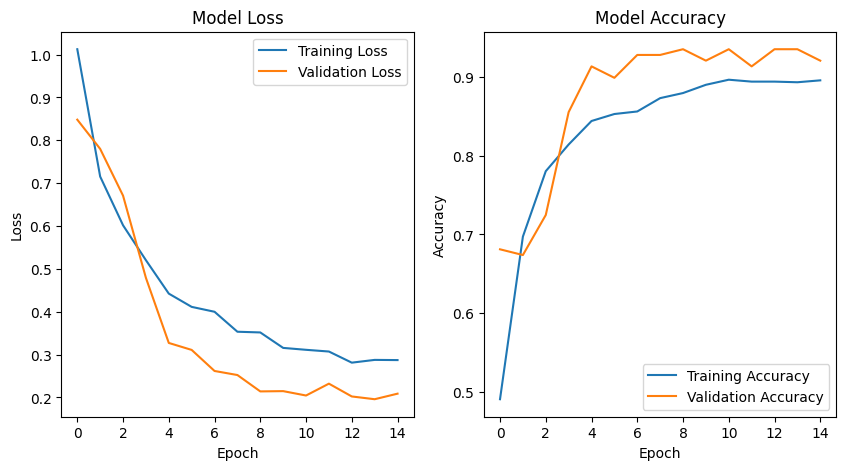

161/161 [==============================] - 10s 62ms/step
precision:  0.9295233761940628
recall:  0.9311761067461916
F1 score:  0.9302131287297527


In [ ]:
#Initialsing an inceptionet CNN with pretrained imagenet weights and keeping all layers trainable
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

#Pooling the layers from the CNN to be fed to the DNN structure
avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

#adding dropout
dropout=tf.keras.layers.Dropout(.5)(avg)


#Hidden layers
hl1 = tf.keras.layers.Dense(1024, activation="elu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="elu")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="elu")(hl2)
hl4 = tf.keras.layers.Dense(128, activation="elu")(hl3)


# The final softmax layer as we only have 3 classes
output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


# Making the model with inputs as the CNN and output as the classification output layer
base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

# Compiling the model
base_model.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.0001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=lr_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

# Create subplots for the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

lr=0.00001

Epoch 1/15
156/156 [==============================] - 28s 158ms/step - loss: 1.2448 - sparse_categorical_accuracy: 0.3325 - val_loss: 1.3665 - val_sparse_categorical_accuracy: 0.2826
Epoch 2/15
156/156 [==============================] - 24s 153ms/step - loss: 1.1683 - sparse_categorical_accuracy: 0.3792 - val_loss: 1.3049 - val_sparse_categorical_accuracy: 0.2826
Epoch 3/15
156/156 [==============================] - 24s 154ms/step - loss: 1.1276 - sparse_categorical_accuracy: 0.3913 - val_loss: 1.1966 - val_sparse_categorical_accuracy: 0.2971
Epoch 4/15
156/156 [==============================] - 24s 151ms/step - loss: 1.0809 - sparse_categorical_accuracy: 0.4275 - val_loss: 1.1378 - val_sparse_categorical_accuracy: 0.3551
Epoch 5/15
156/156 [==============================] - 24s 155ms/step - loss: 1.0431 - sparse_categorical_accuracy: 0.4807 - val_loss: 1.0131 - val_sparse_categorical_accuracy: 0.4420
Epoch 6/15
156/156 [==============================] - 24s 152ms/step - loss: 1.0182 -

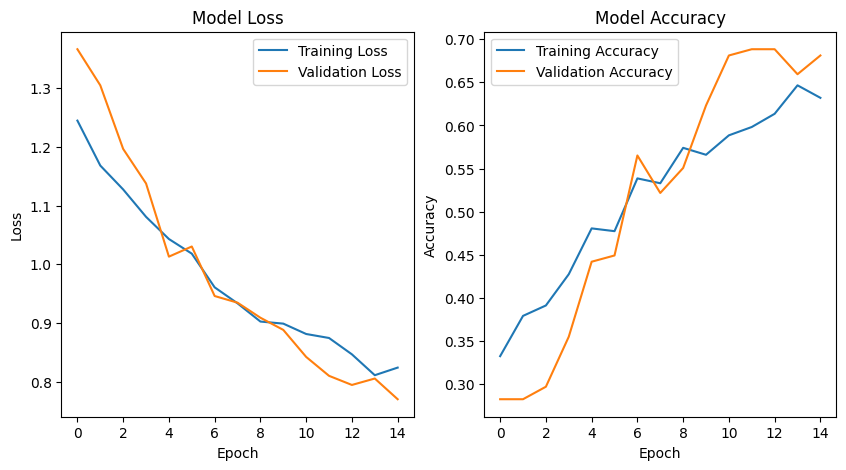

161/161 [==============================] - 11s 63ms/step
precision:  0.713273043583306
recall:  0.7949289961066657
F1 score:  0.7426569962836463


In [ ]:
#Initialsing an inceptionet CNN with pretrained imagenet weights and keeping all layers trainable
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

#Pooling the layers from the CNN to be fed to the DNN structure
avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

#adding dropout
dropout=tf.keras.layers.Dropout(.5)(avg)


#Hidden layers
hl1 = tf.keras.layers.Dense(1024, activation="elu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="elu")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="elu")(hl2)
hl4 = tf.keras.layers.Dense(128, activation="elu")(hl3)

# The final softmax layer as we only have 3 classes
output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


# Making the model with inputs as the CNN and output as the classification output layer
base_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

# Compiling the model
base_model.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.00001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=base_model.fit(train_data_generator,epochs=lr_epoch,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

# Create subplots for the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plot
plt.show()

base_model.evaluate(test_data_generator)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = base_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

Best Model

In [ ]:
#Parameters choosen for the Best model are

epoch_val=50
dropout_val=0.5
activation_func="elu"
hidden_layer1 =tf.keras.layers.Dense(1024, activation=activation_func)
hidden_layer2 =tf.keras.layers.Dense(512, activation=activation_func)
hidden_layer3 =tf.keras.layers.Dense(256, activation=activation_func)
hidden_layer4 =tf.keras.layers.Dense(128, activation=activation_func)
learning_rate_val=0.0001
optimizer=tf.keras.optimizers.Adagrad(learning_rate=learning_rate_val)


Epoch 1/50
156/156 [==============================] - 40s 210ms/step - loss: 0.9694 - sparse_categorical_accuracy: 0.5435 - val_loss: 0.7690 - val_sparse_categorical_accuracy: 0.7101
Epoch 2/50
156/156 [==============================] - 25s 162ms/step - loss: 0.6604 - sparse_categorical_accuracy: 0.7432 - val_loss: 0.6501 - val_sparse_categorical_accuracy: 0.7101
Epoch 3/50
156/156 [==============================] - 23s 148ms/step - loss: 0.5259 - sparse_categorical_accuracy: 0.8164 - val_loss: 0.4503 - val_sparse_categorical_accuracy: 0.8696
Epoch 4/50
156/156 [==============================] - 23s 147ms/step - loss: 0.4533 - sparse_categorical_accuracy: 0.8341 - val_loss: 0.3512 - val_sparse_categorical_accuracy: 0.8841
Epoch 5/50
156/156 [==============================] - 24s 151ms/step - loss: 0.4240 - sparse_categorical_accuracy: 0.8454 - val_loss: 0.2938 - val_sparse_categorical_accuracy: 0.8913
Epoch 6/50
156/156 [==============================] - 24s 151ms/step - loss: 0.3952 -

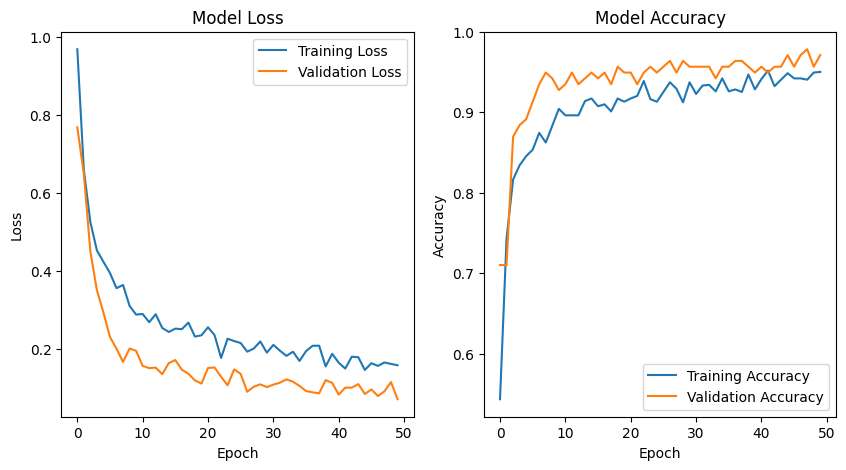

161/161 [==============================] - 11s 64ms/step
precision:  0.9343423759071681
recall:  0.9610714483369307
F1 score:  0.946720779843294


In [ ]:
pretrained_resnet_cnn = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
)

avg = tf.keras.layers.GlobalAveragePooling2D()(pretrained_resnet_cnn.output)

dropout=tf.keras.layers.Dropout(dropout_val)(avg)


hl1 = tf.keras.layers.Dense(1024, activation="elu")(dropout)
hl2 = tf.keras.layers.Dense(512, activation="elu")(hl1)
hl3 = tf.keras.layers.Dense(256, activation="elu")(hl2)
hl4 = tf.keras.layers.Dense(128, activation="elu")(hl3)

output = tf.keras.layers.Dense(3, activation="softmax")(hl4)


best_model = tf.keras.models.Model(inputs=pretrained_resnet_cnn.input, outputs=output)

best_model.compile(optimizer = optimizer,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

history=best_model.fit(train_data_generator,epochs=epoch_val,validation_data=val_data_generator,verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

best_model.evaluate(test_data_generator)


y_train_pred = best_model.predict(test_data_generator)
y_train_pred = np.argmax(y_train_pred,axis=1)

confusion_matrix(test_data_generator.classes, y_train_pred)

p = precision_score(test_data_generator.classes, y_train_pred, average = 'macro')
r = recall_score(test_data_generator.classes, y_train_pred, average = 'macro')
f = f1_score(test_data_generator.classes, y_train_pred, average = 'macro')

print('precision: ', p)
print('recall: ', r)
print('F1 score: ', f)

In [ ]:
best_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

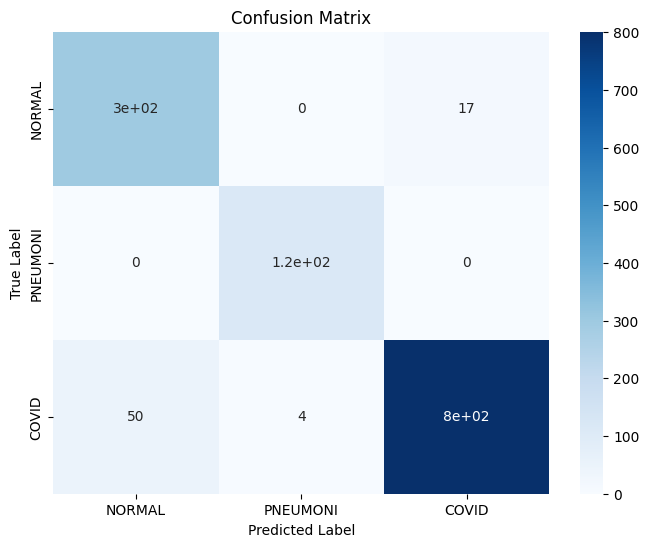

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(test_data_generator.classes, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['NORMAL','PNEUMONI','COVID'], yticklabels=['NORMAL','PNEUMONI','COVID'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
tf.keras.utils.plot_model(base_model, "inception_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
